In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
print(X.shape,Y.shape)

(1600, 5) (1600,)


In [4]:
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

# Normalise the Data
X = (X-u)/std

In [5]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [6]:
theta,error_list = gradient_descent(X,Y)

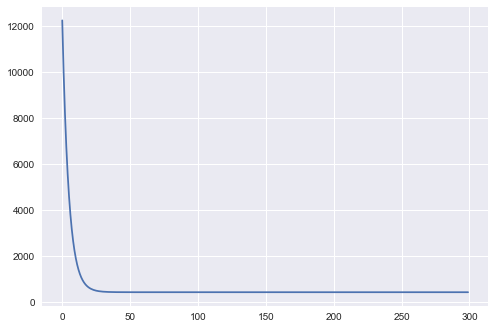

In [7]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [8]:
print(theta)

[29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


In [9]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [10]:
## Predictions
y_ = hypothesis(X,theta)
#accuracy on train set
r2_score(Y,y_)

96.60856726304088

In [11]:
xtest = pd.read_csv("Test.csv")
print(xtest.shape)
xtest = xtest.values

(400, 5)


In [12]:
m = xtest.shape[0]
n = xtest.shape[1]
y_pred = []
for i in range(m):
    lx = hypothesis(xtest[i],theta)
    y_pred.append(lx)

In [13]:
y_pred_a = np.array(y_pred)
print(y_pred_a.shape)

(400,)


In [14]:
ID = [ix for ix in range(0,400)]
submiss = pd.DataFrame({"Id" : ID ,"target" : y_pred_a})
submiss.to_csv("sample_submission.csv",index = False)
submiss.head()

,Id,target
0,0,111.832848
1,1,115.560932
2,2,-26.195097
3,3,-47.954675
4,4,-102.836817
